In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# set initial values
G = 1
m1 = 1
m2 = 1
m3 = 1
r1 = np.array([-0.97000436, 0.24308753])
v1 = np.array([-0.46620368, -0.43236573])
r2 = np.array([0.97000436, -0.24308753])
v2 = np.array([-0.46620368, -0.43236573])
r3 = np.array([0.0, 0.0])
v3 = np.array([0.93240737, 0.86473146])

h = 0.005

# calculate radius
def rad(r):
    return math.sqrt(sum([i**2 for i in r]))

# calculate acceleration
def acc(r1, r2, m):
    r = [i - j for i,j in zip(r1, r2)]
    # return np.array([i * G * (m1 + m2) / -(rad(r)**3) for i in r])
    return np.array([i * G * m / -(rad(r)**3) for i in r])

# integrand  v1, v2, v3, a1, a2, a3
def fcn (x, m1, m2, m3):
    y = []
    y.append(acc(x[3], x[4], m2) + acc(x[3], x[5], m3))
    y.append(acc(x[4], x[3], m1) + acc(x[4], x[5], m3))
    y.append(acc(x[5], x[3], m1) + acc(x[5], x[4], m2))
    y.append(x[0])
    y.append(x[1])
    y.append(x[2])
    return y

# RK4 update r1, r2, r3, v1, v2, v3
def RK4(h, r1, r2, r3, v1, v2, v3, m1, m2, m3):
    y = ([v1, v2, v3, r1, r2, r3])
    k1 = [h * n for n in fcn(y, m1, m2, m3)]
    k2 = [h * n for n in fcn([i + 0.5 * j for i, j in zip(y, k1)], m1, m2, m3)]
    k3 = [h * n for n in fcn([i + 0.5 * j for i, j in zip(y, k2)], m1, m2, m3)]
    k4 = [h * n for n in fcn([i + j for i, j in zip(y, k3)], m1, m2, m3)]
    return [i + (j + 2 * k + 2 * l + m) / 6.0 for i, j, k, l, m in zip(y, k1, k2, k3, k4)]

def orbit(h, r1, r2, r3, v1, v2, v3, m1, m2, m3, t):
    o1 = []
    o2 = []
    o3 = []
    o1.append(r1)
    o2.append(r2)
    o3.append(r3)
    for i in range (0, int(t / h)):
        y = RK4 (h, r1, r2, r3, v1, v2, v3, m1, m2, m3)
        v1new = y[0]
        v2new = y[1]
        v3new = y[2]
        r1new = y[3]
        r2new = y[4]
        r3new = y[5]
        o1.append(r1new)
        o2.append(r2new)
        o3.append(r3new)
        r1 = r1new
        r2 = r2new
        r3 = r3new
        v1 = v1new
        v2 = v2new
        v3 = v3new
    return o1, o2, o3

t = 4
o1, o2, o3 = orbit(h, r1, r2, r3, v1, v2, v3, m1, m2, m3, t)
x1 = [x[0] for x in o1]
y1 = [x[1] for x in o1]
x2 = [x[0] for x in o2]
y2 = [x[1] for x in o2]
x3 = [x[0] for x in o3]
y3 = [x[1] for x in o3]
plt.plot(x1, y1)
plt.show()
plt.plot(x2, y2)
plt.show()
plt.plot(x3, y3)
plt.show()


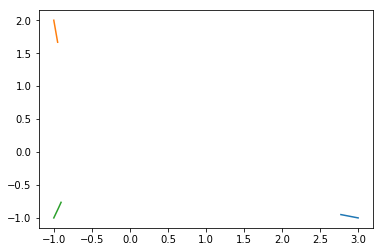

In [52]:
m1 = 3
m2 = 4
m3 = 5

# set the origin of coordinate system into the center of mass of the system
r1 = np.array([3.0, -1.0])
r2 = np.array([-1.0, 2.0])
r3 = np.array([-1.0, -1.0])

v1 = np.array([0.0, 0.0])
v2 = np.array([0.0, 0.0])
v3 = np.array([0.0, 0.0])

t = 1
o1, o2, o3 = orbit(h, r1, r2, r3, v1, v2, v3, m1, m2, m3, t)
x1 = [x[0] for x in o1]
y1 = [x[1] for x in o1]
x2 = [x[0] for x in o2]
y2 = [x[1] for x in o2]
x3 = [x[0] for x in o3]
y3 = [x[1] for x in o3]
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.show()